<h1 align = "center" > Recent Heart Attack Analysis and Prediction </h1>

#### Heart Attack Definition

A heart attack, medically known as a myocardial infarction (MI), occurs when blood flow to a part of the heart muscle is blocked for a long enough time that part of the heart muscle is damaged or dies. The blockage is usually caused by a buildup of fatty deposits, including cholesterol, which forms plaques in the coronary arteries that supply blood to the heart. When a plaque breaks, a blood clot forms around it, which can block the flow of blood to the heart muscle

#### Fields in the Dataset

#### Required Basic Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Initial review and analysis of data

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print("Shape of the Dataset:", df.shape)

Shape of the Dataset: (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Null Values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

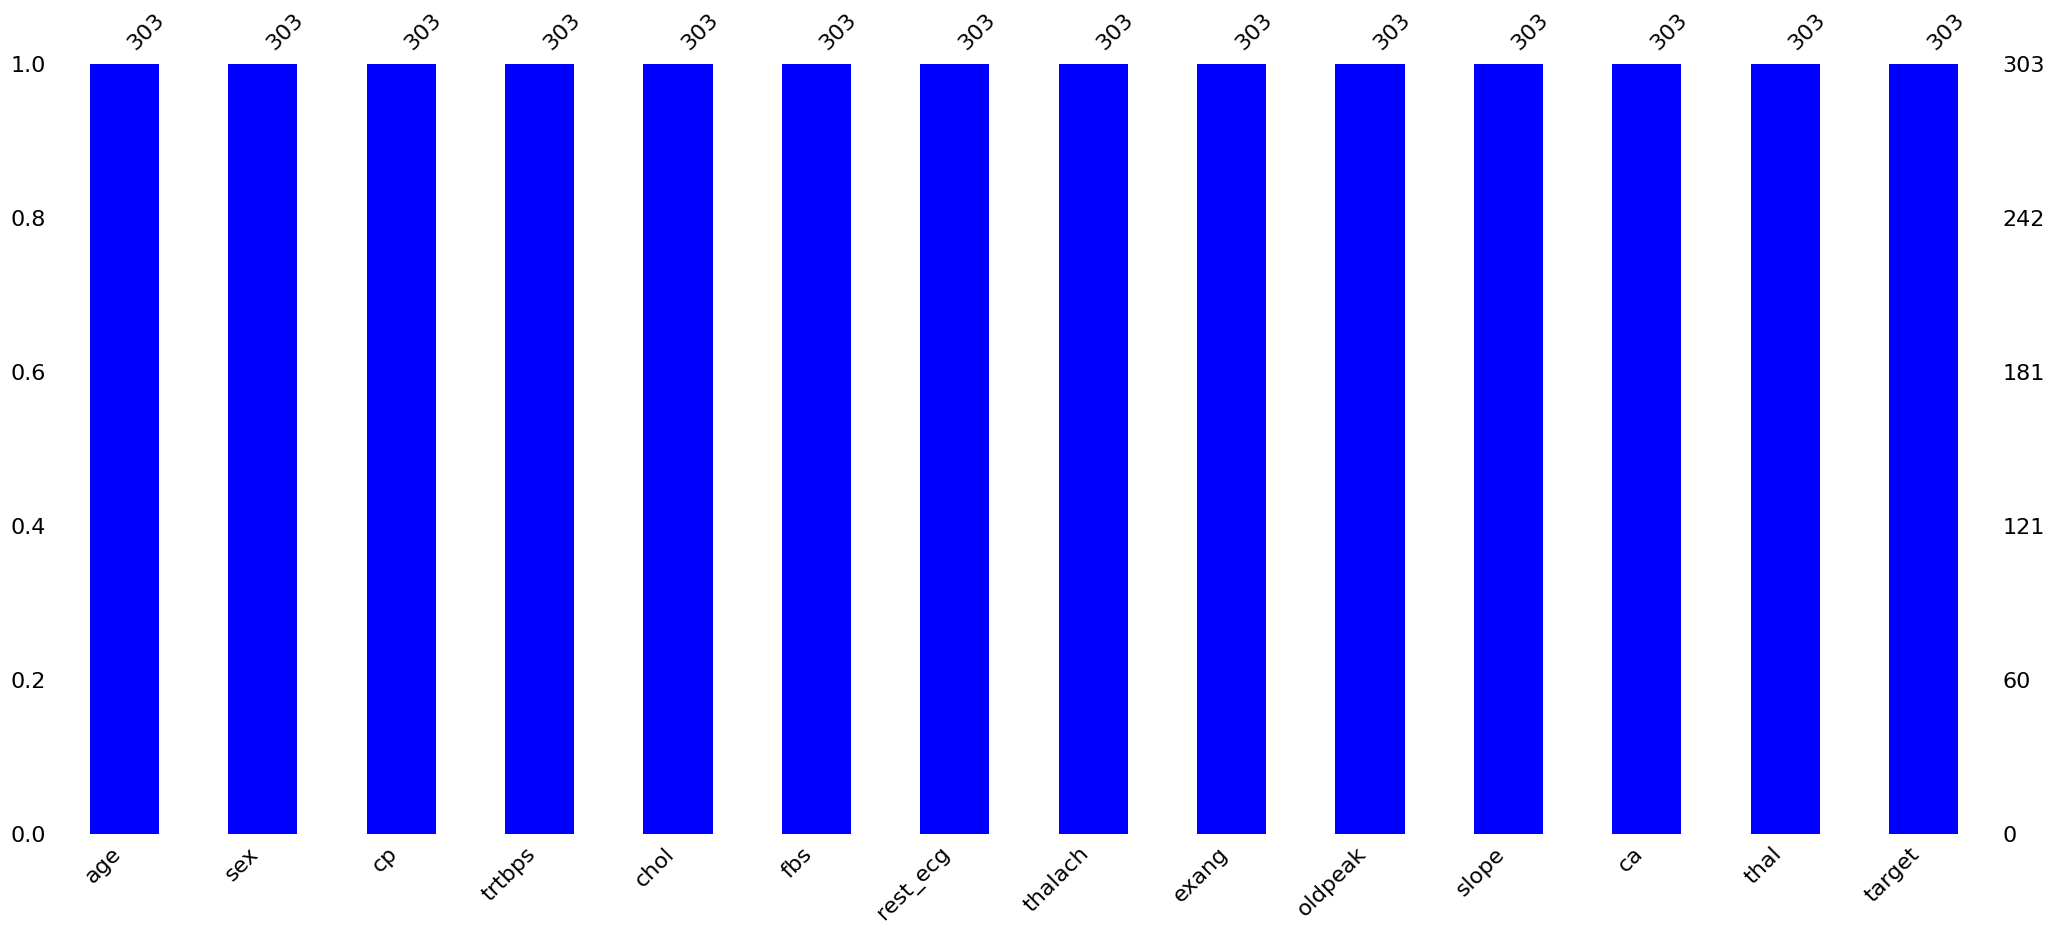

In [12]:
import missingno
missingno.bar(df, color = "b")

#### Unique Values

In [13]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [14]:
df["cp"].value_counts().count()

4

In [15]:
df["cp"].value_counts().sum()

303

In [16]:
unique_values = [] 
for i in df.columns: 
    x = df[i].value_counts().count() 
    unique_values.append(x)

pd.DataFrame(unique_values, index = df.columns, columns = ["Total Unique Value"])

,Total Unique Value
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


#### Variables Separation

In [17]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
# categorical_var = ["sex", "cp", "fbs","rest_ecg", "exang", "slope", "ca", "thal", "target"]
categorical_var = ["sex", "cp", "fbs"]

#### Statistical Variable

In [19]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [21]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

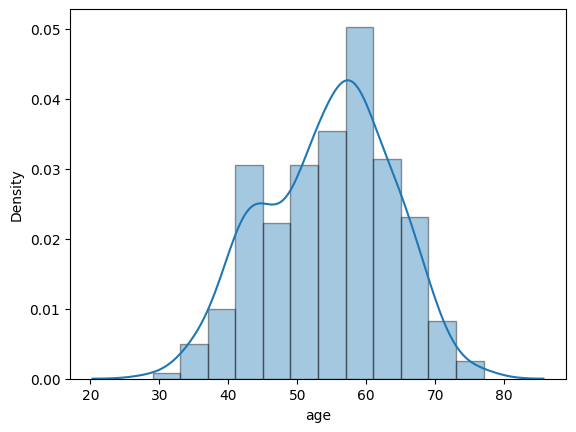

In [22]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<Axes: xlabel='trtbps', ylabel='Density'>

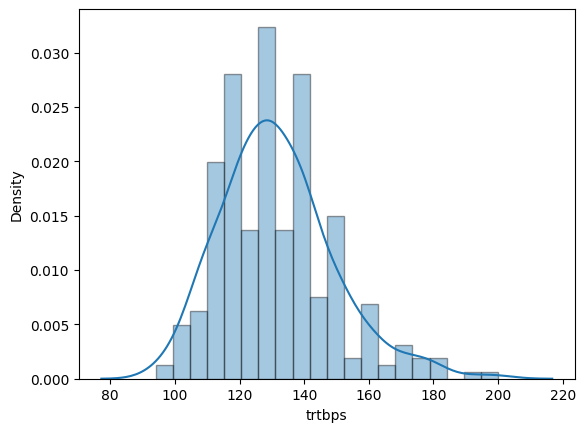

In [23]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

<Axes: xlabel='chol', ylabel='Density'>

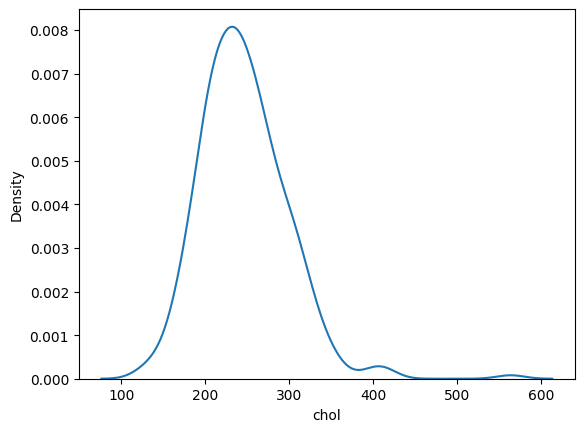

In [24]:
sns.distplot(df["chol"], hist = False)

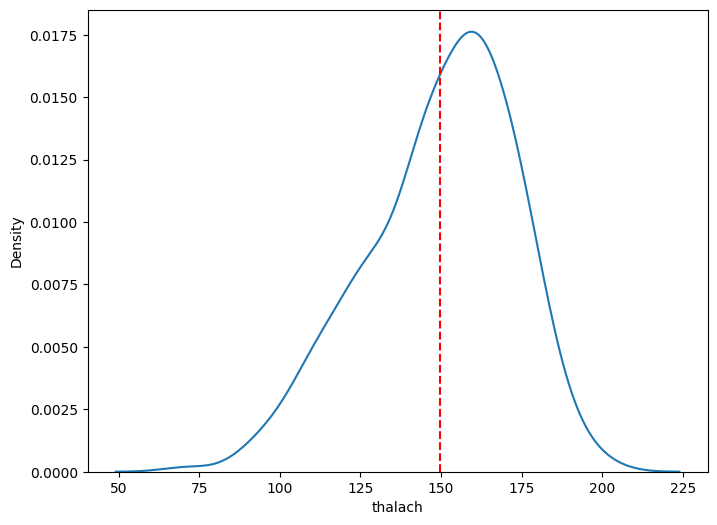

In [25]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--")

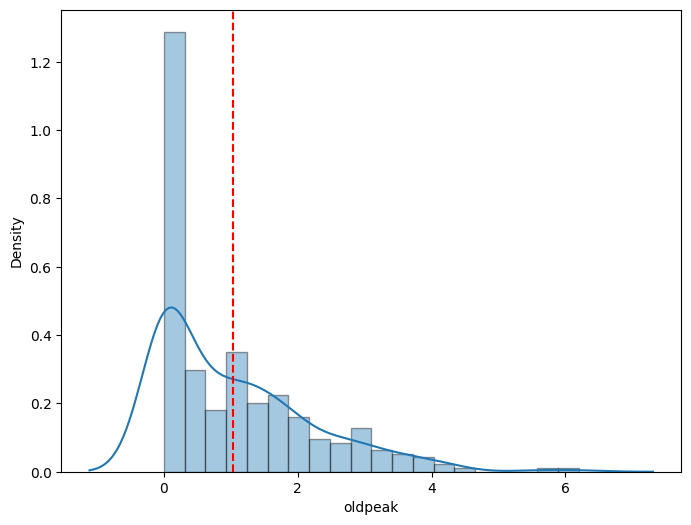

In [26]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--")

#### Ecploratory Analysis

In [27]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [28]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [29]:
list(zip(numeric_axis_name))

[('Age of the Patient',),
 ('Resting Blood Pressure',),
 ('Cholesterol',),
 ('Maximum Heart Rate Achieved',),
 ('ST Depression',)]

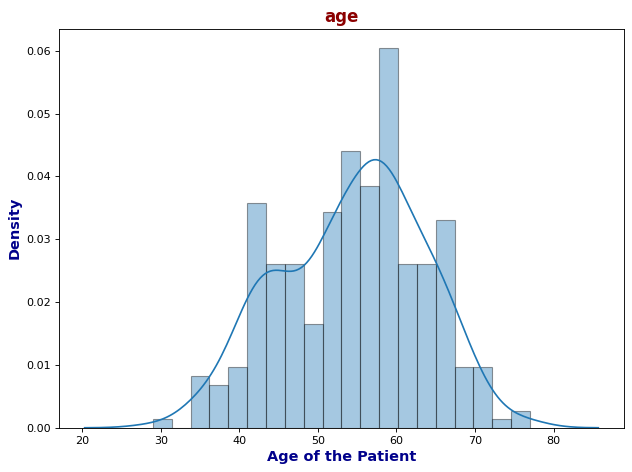

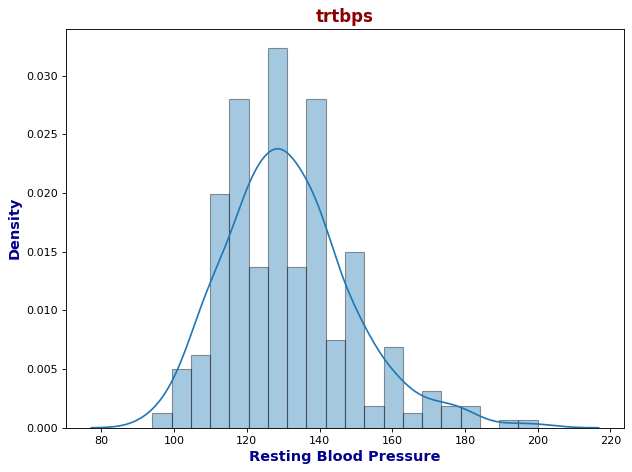

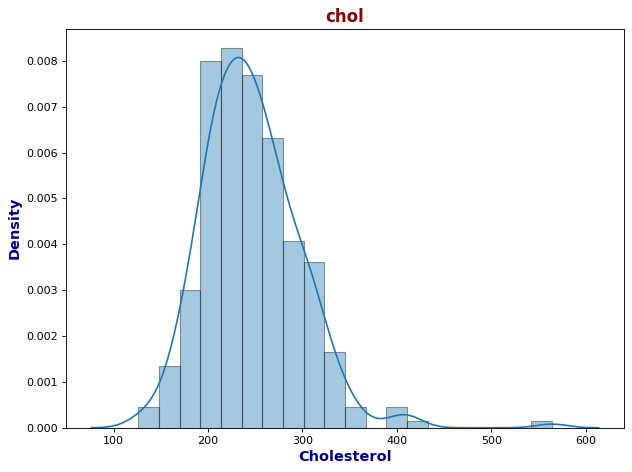

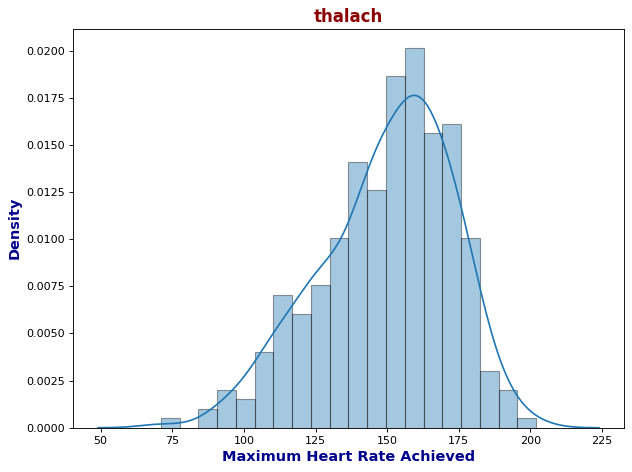

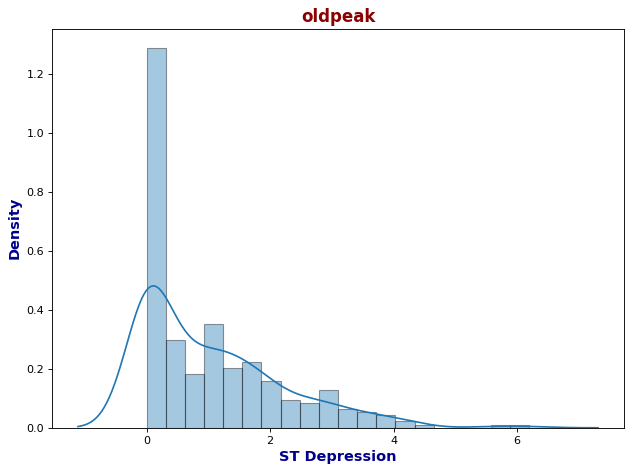

In [30]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font =  {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### Exammining Categorical Variables

In [31]:
categorical_var

['sex', 'cp', 'fbs']

In [32]:
# categorical_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results", "Exercise Induce Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

categorical_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood Sugar"]

In [33]:
list(zip(categorical_var, categorical_axis_name))

[('sex', 'Gender'), ('cp', 'Chest Pain Type'), ('fbs', 'Fasting Blood Sugar')]

In [34]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [35]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [36]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

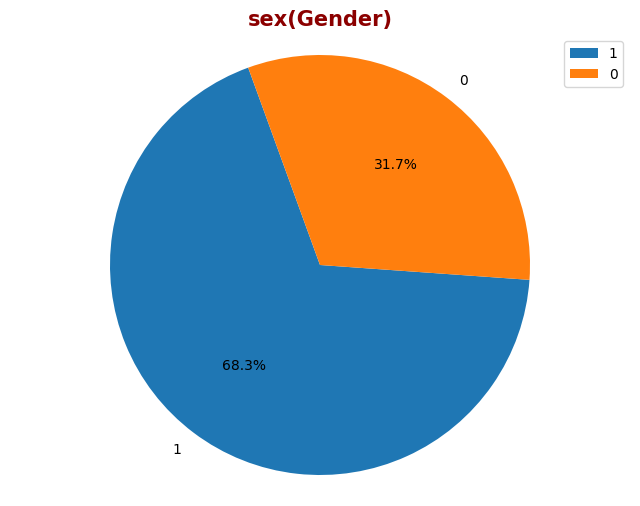

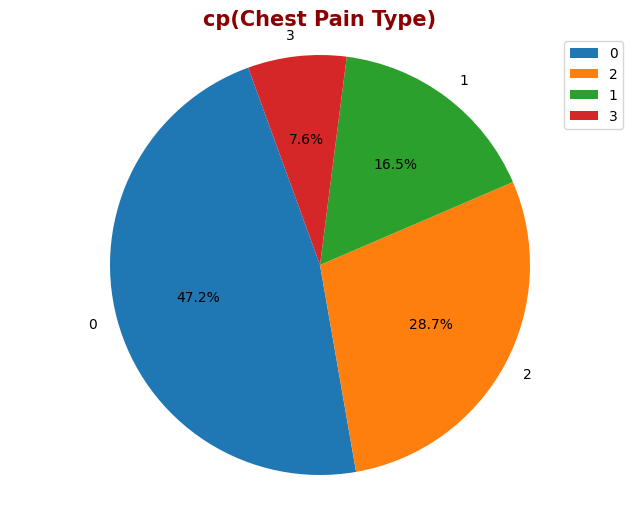

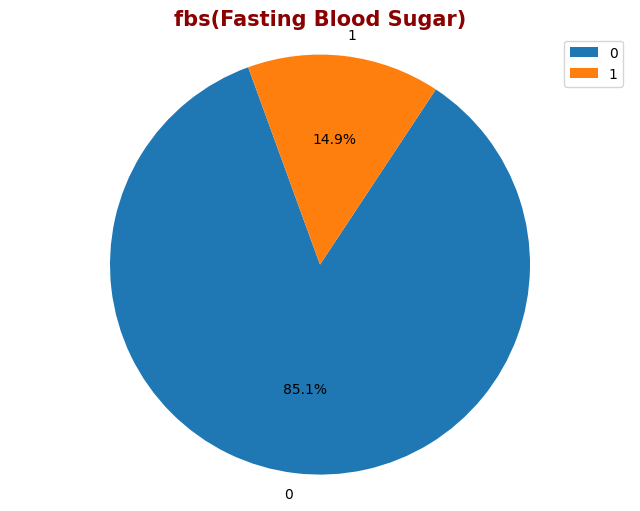

In [37]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font =  {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(categorical_var, categorical_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%',startangle = 110, labeldistance = 1.1)
    ax.axis("equal")
        
    plt.title((i + "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()
    

#### Missing Data

In [38]:
df[df["thalach"] != 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

#### Bivariate Analysis of Numerical Variables

In [40]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

#### Add target Variable

In [41]:
numeric_var.append("target")

In [42]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

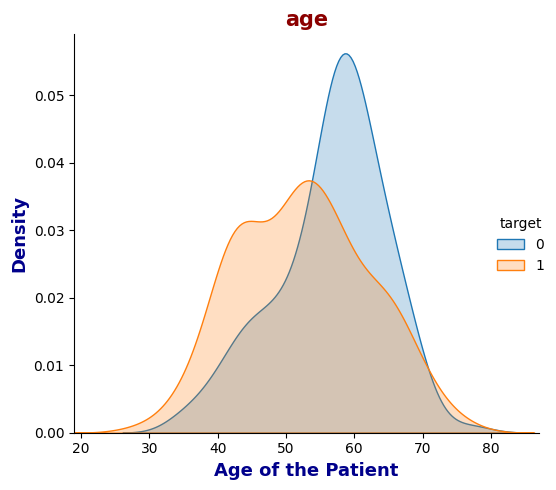

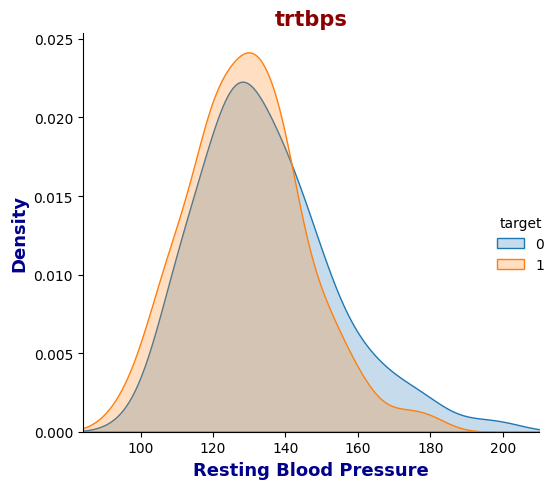

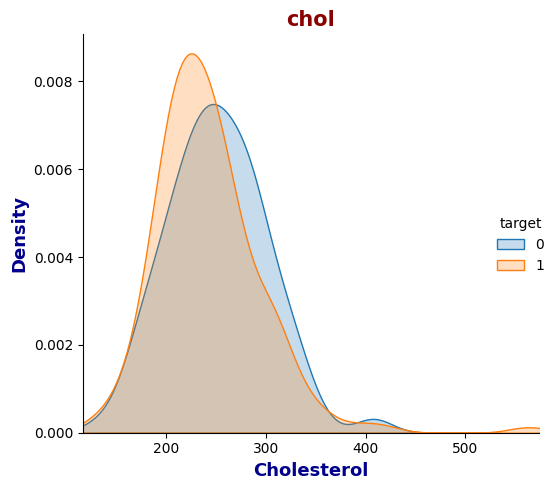

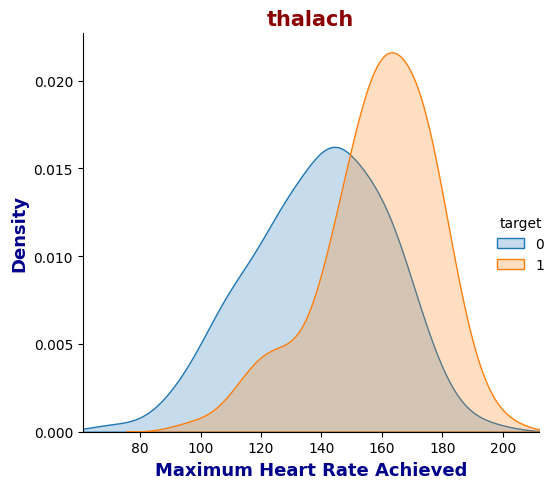

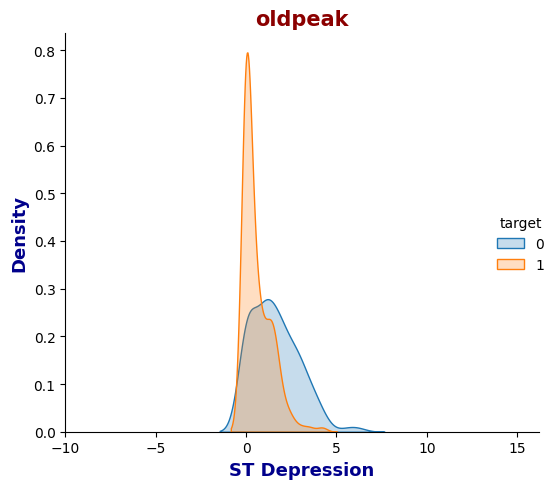

In [43]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font =  {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max()+10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [44]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [45]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### Examining Categorical Variables

In [46]:
categorical_var

['sex', 'cp', 'fbs']

In [47]:
categorical_var

['sex', 'cp', 'fbs']

In [48]:
df[categorical_var].corr().iloc[:, [-1]]

,fbs
sex,0.045032
cp,0.094444
fbs,1.000000


In [49]:
df[categorical_var].columns.duplicated()

array([False, False, False])

In [50]:
df[categorical_var]

,sex,cp,fbs
0,1,3,1
1,1,2,0
2,0,1,0
3,1,1,0
4,0,0,0
...,...,...,...
298,0,0,0
299,1,3,0
300,1,0,1
301,1,0,0


In [51]:
df = df.T.drop_duplicates().T

In [52]:
ab = df[categorical_var].T.drop_duplicates().T

In [53]:
ab

,sex,cp,fbs
0,1.0,3.0,1.0
1,1.0,2.0,0.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
298,0.0,0.0,0.0
299,1.0,3.0,0.0
300,1.0,0.0,1.0
301,1.0,0.0,0.0


In [54]:
ab = ab.astype('int')

In [55]:
ab

,sex,cp,fbs
0,1,3,1
1,1,2,0
2,0,1,0
3,1,1,0
4,0,0,0
...,...,...,...
298,0,0,0
299,1,3,0
300,1,0,1
301,1,0,0


In [56]:
ab.corr()

,sex,cp,fbs
sex,1.000000,-0.049353,0.045032
cp,-0.049353,1.000000,0.094444
fbs,0.045032,0.094444,1.000000


In [57]:
ab.corr().iloc[:, [-1]]

,fbs
sex,0.045032
cp,0.094444
fbs,1.000000


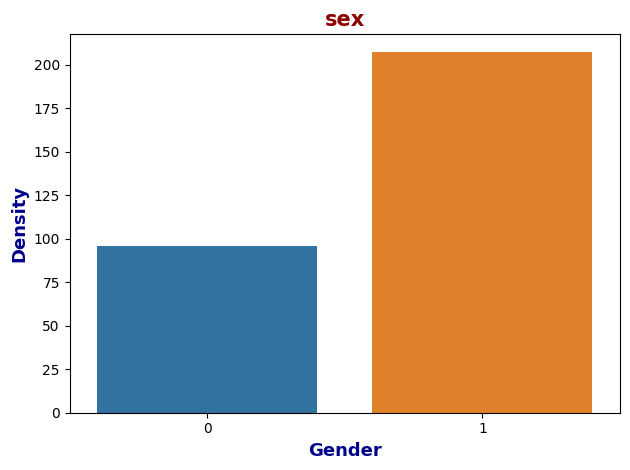

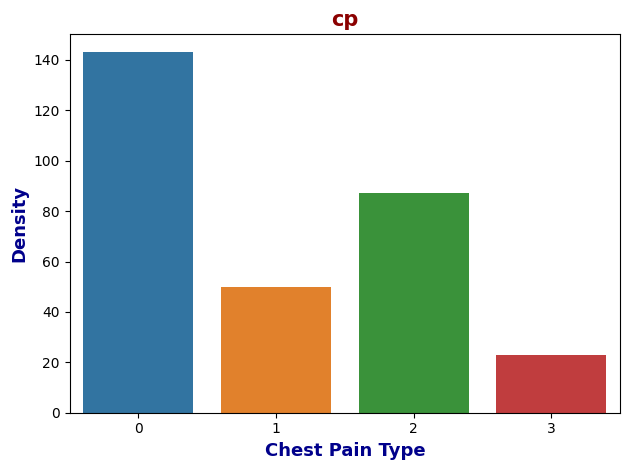

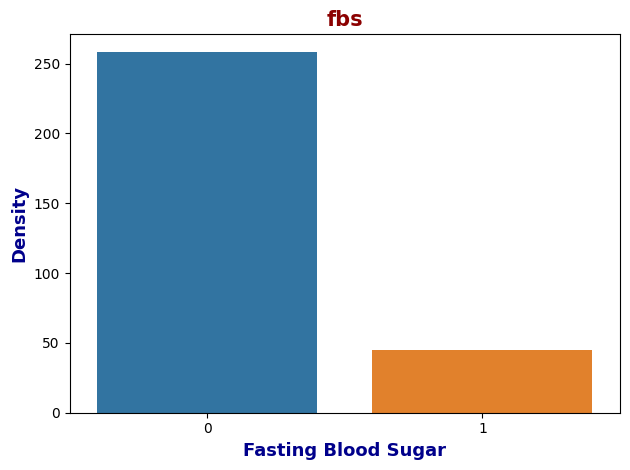

In [58]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font =  {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categorical_var, categorical_axis_name)):
    sns.countplot(x = i, data = ab) #hue = "target")
  
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### Relationships between Numerical Variables - Pair Plot

In [59]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [60]:
numeric_var.remove('target')

In [61]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,37.0,130.0,250.0,187.0,3.5
2,41.0,130.0,204.0,172.0,1.4
3,56.0,120.0,236.0,178.0,0.8
4,57.0,120.0,354.0,163.0,0.6


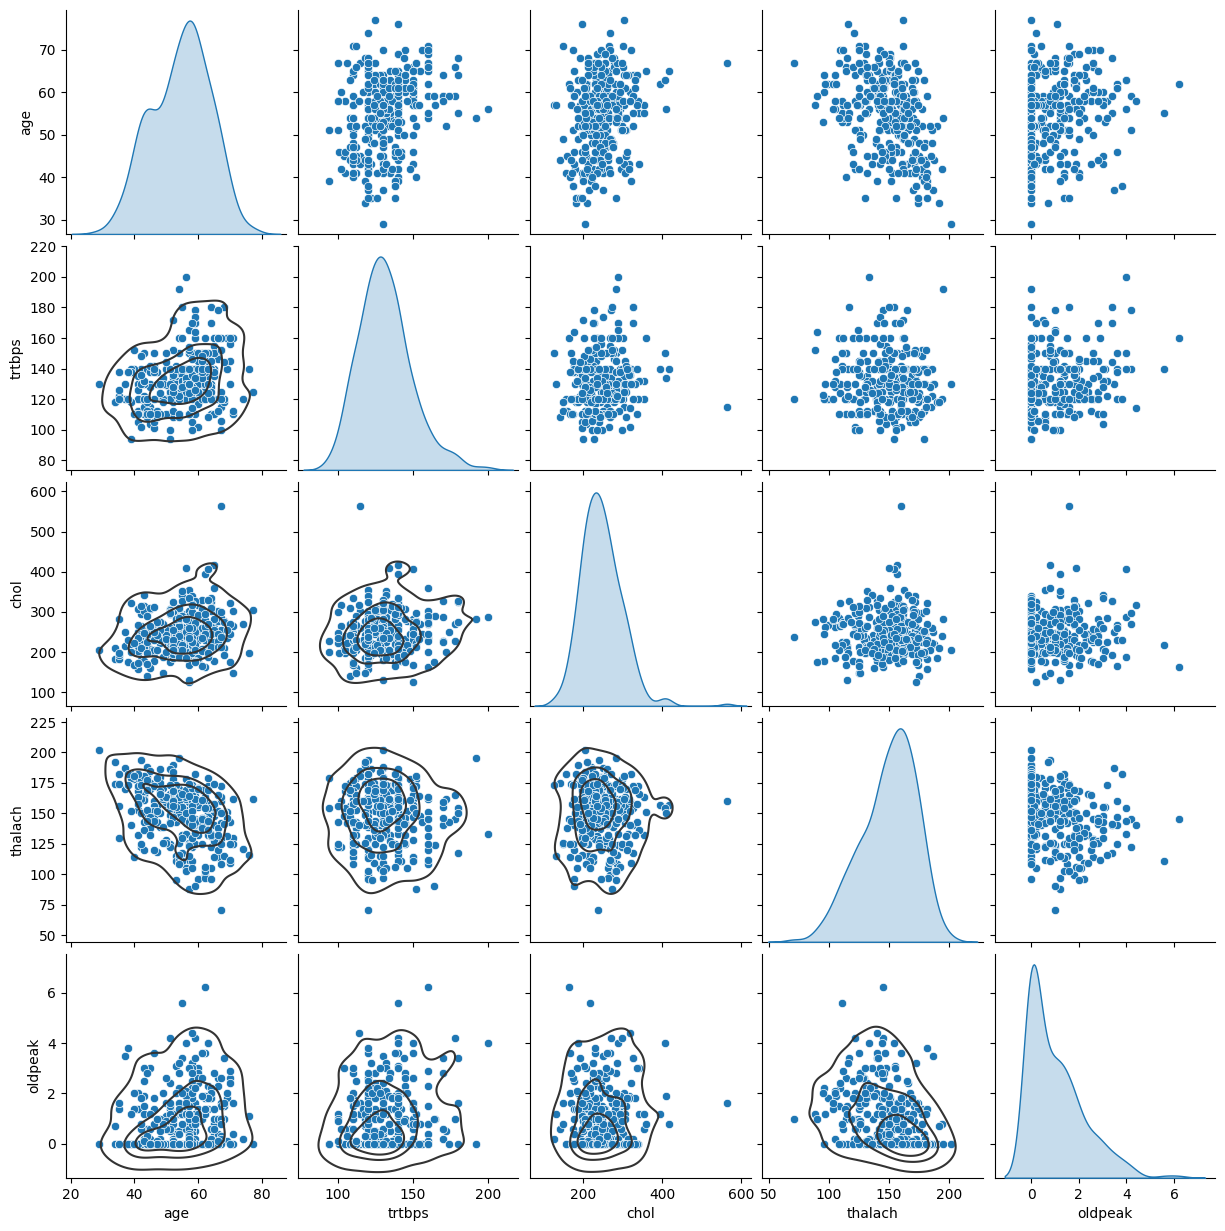

In [62]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

#### Feature Scaling

In [63]:
from sklearn.preprocessing import RobustScaler

In [64]:
robust_scaler = RobustScaler()

In [65]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [66]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [67]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### New Dataframe with Melt function

In [68]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)

In [69]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1.0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1.0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1.0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1.0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1.0


#### Change Structure of Data frame with Melt function

In [70]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variable", value_name = "value")

In [71]:
melted_data

,target,variable,value
0,1.0,age,0.592593
1,1.0,age,-1.333333
2,1.0,age,-1.037037
3,1.0,age,0.074074
4,1.0,age,0.148148
...,...,...,...
1510,0.0,oldpeak,-0.375000
1511,0.0,oldpeak,0.250000
1512,0.0,oldpeak,1.625000
1513,0.0,oldpeak,0.250000


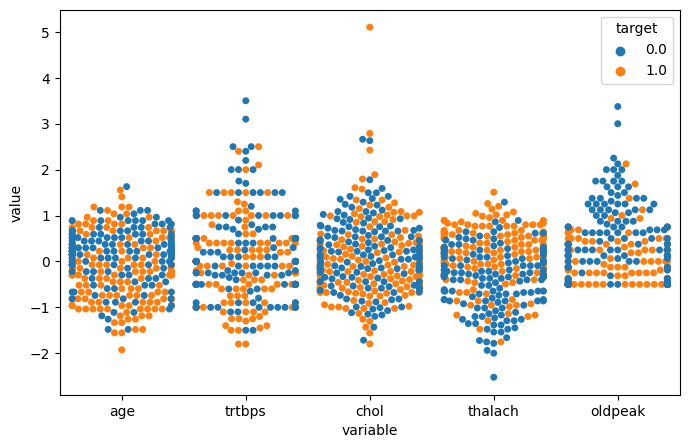

In [72]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variable", y = "value", hue = "target", data = melted_data)
plt.show()

#### Numerical Variables - Categorical Variables (Swarm Plots)

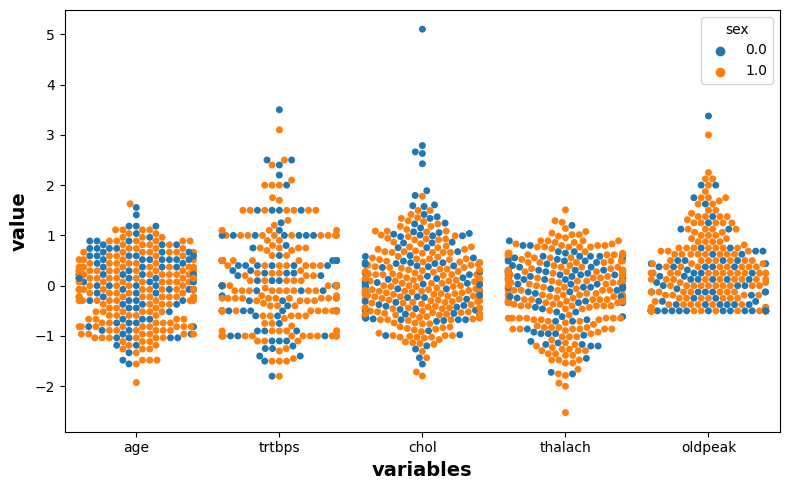

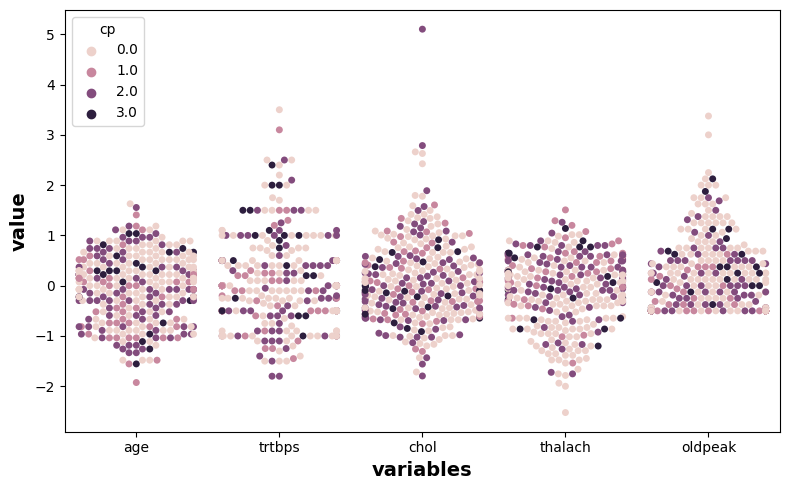

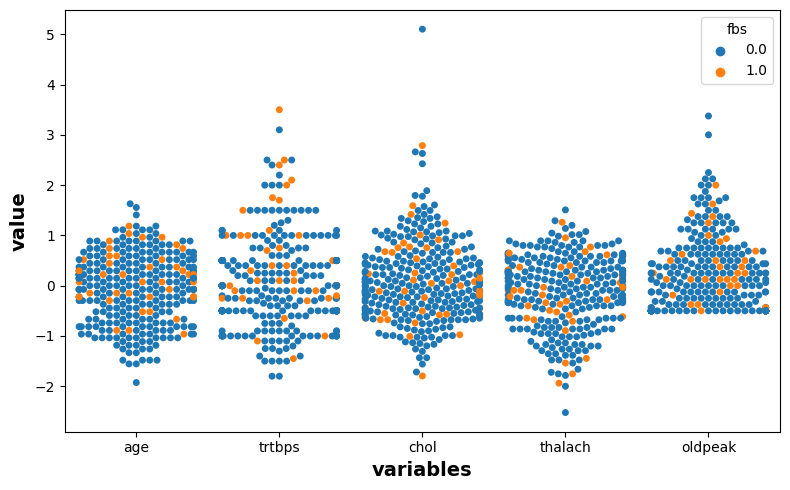

In [73]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variable", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variable", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

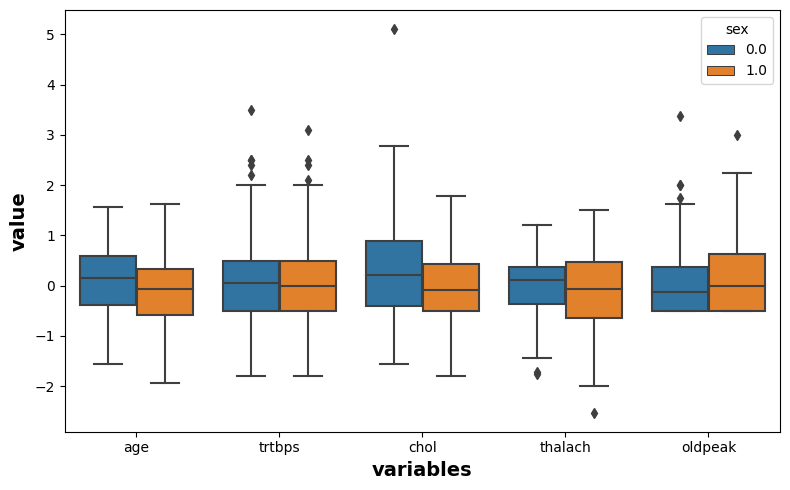

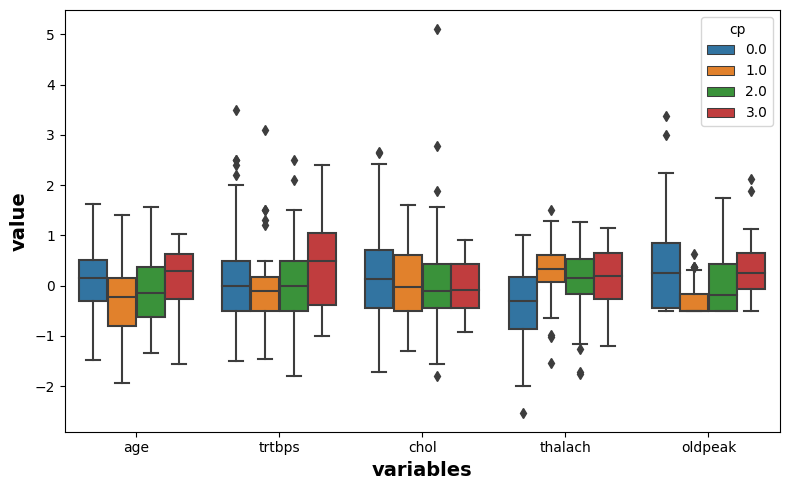

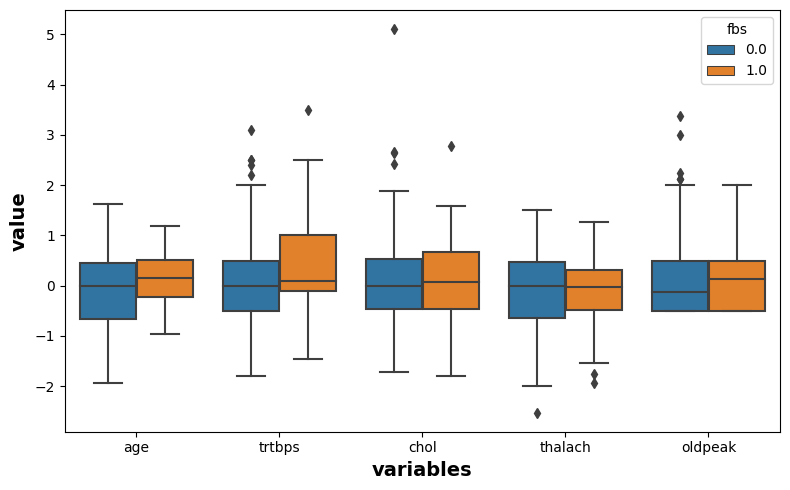

In [74]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variable", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variable", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### Relationship between variables using Heatmaps

In [75]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


#### Add Categorical variables

In [76]:
df_new2 = pd.concat([df_scaled, df[categorical_var]], axis = 1)

In [77]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1.0,3.0,1.0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1.0,2.0,0.0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0.0,1.0,0.0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1.0,1.0,0.0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0.0,0.0,0.0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1.0,3.0,0.0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1.0,0.0,1.0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1.0,0.0,0.0


In [78]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000


<Axes: >

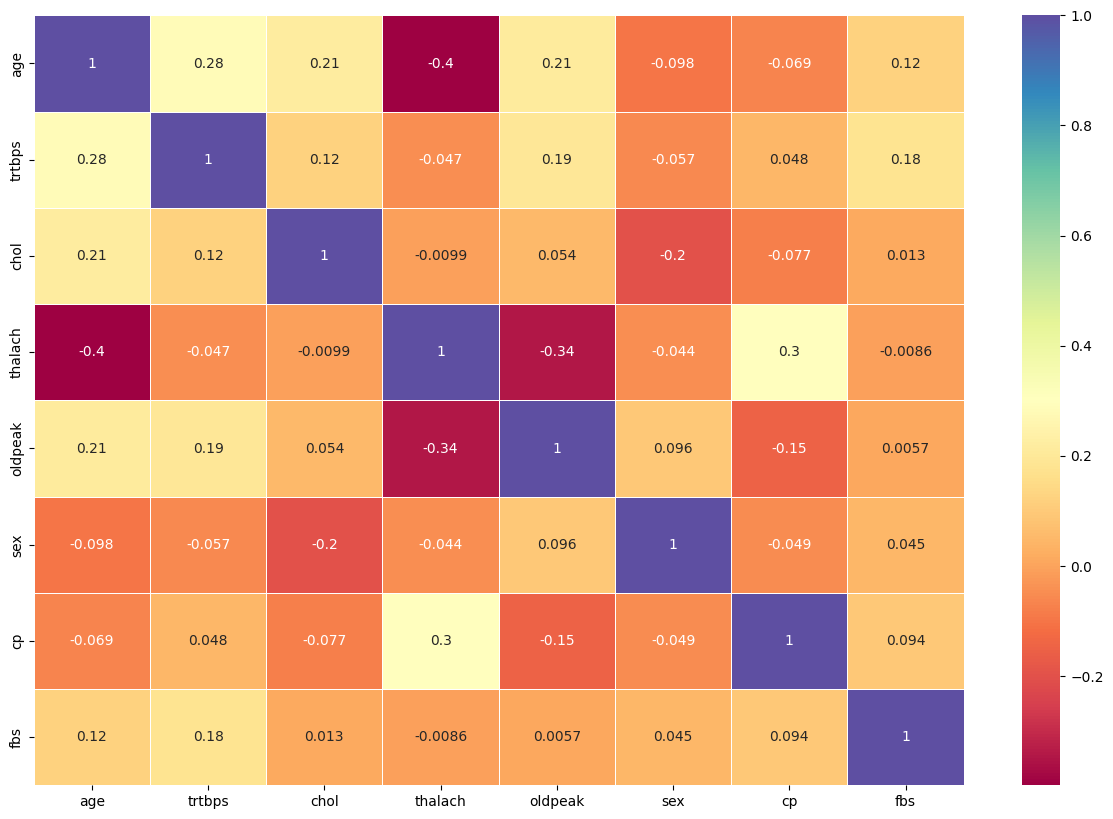

In [79]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

#### Preparing the Dataset for Modeling

In [80]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [81]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

In [82]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


#### Looking into Outliers

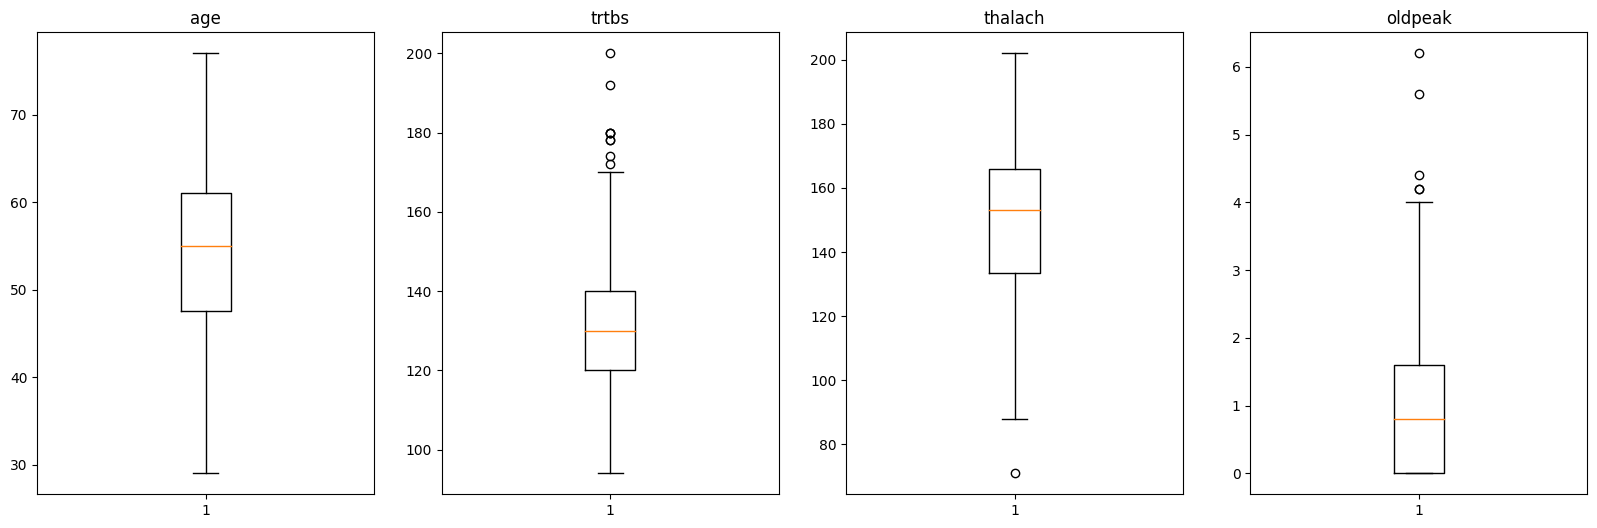

In [83]:
fig, (ax1,  ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbs")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#### Examining Outliers in Trtbps

In [84]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [85]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("--------------------")

Threshold Value: 1
Number of Outliers: 51
--------------------
Threshold Value: 2
Number of Outliers: 13
--------------------
Threshold Value: 3
Number of Outliers: 2
--------------------


In [86]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172.0
101,178.0
110,180.0
152,170.0
195,170.0
203,180.0
223,200.0
228,170.0
241,174.0
248,192.0


In [87]:
df[z_scores_trtbps > 2].trtbps.min()

170.0

In [88]:
df[df["trtbps"] < 170].trtbps.max()

165.0

In [89]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [90]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [91]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

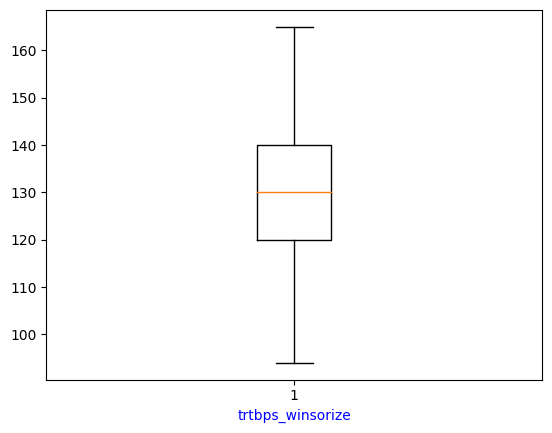

In [92]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [93]:
df["trtbps_winsorize"] = trtbps_winsorize

In [94]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,145.0
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,130.0
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,130.0
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,120.0
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,120.0


#### Thalach Outliers

In [95]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [96]:
thalach_out = iqr(df, "thalach")

In [97]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67.0,1.0,0.0,120.0,71.0,0.0,1.0,1.0,0.0,2.0,0.0,120.0


In [98]:
df.drop([272],  axis = 0, inplace = True)

In [99]:
df["thalach"][270:275]

270    144.0
271    145.0
273    156.0
274    118.0
275    168.0
Name: thalach, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca3ab13df00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca3ab13f130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca3ab13eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca3ab13d690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca3ab13ea10>],
 'means': []}

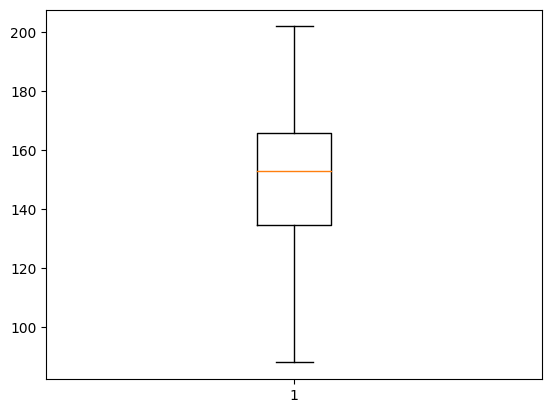

In [100]:
plt.boxplot(df["thalach"])

In [101]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [102]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59.0,1.0,3.0,178.0,145.0,0.0,4.2,0.0,0.0,3.0,1.0,165.0
204,62.0,0.0,0.0,160.0,145.0,0.0,6.2,0.0,3.0,3.0,0.0,160.0
221,55.0,1.0,0.0,140.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0,140.0
250,51.0,1.0,0.0,140.0,122.0,1.0,4.2,1.0,3.0,3.0,0.0,140.0
291,58.0,1.0,0.0,114.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0,114.0


In [103]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [104]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [105]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

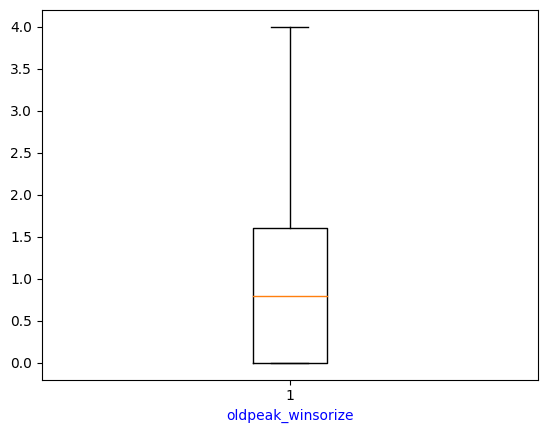

In [106]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [107]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [108]:
df

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,145.0,2.3
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,130.0,3.5
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,130.0,1.4
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,120.0,0.8
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,120.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,140.0,0.2
299,45.0,1.0,3.0,110.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,110.0,1.2
300,68.0,1.0,0.0,144.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,144.0,3.4
301,57.0,1.0,0.0,130.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,130.0,1.2


In [109]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [110]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63.0,1.0,3.0,150.0,0.0,0.0,0.0,1.0,1.0,145.0,2.3
1,37.0,1.0,2.0,187.0,0.0,0.0,0.0,2.0,1.0,130.0,3.5
2,41.0,0.0,1.0,172.0,0.0,2.0,0.0,2.0,1.0,130.0,1.4
3,56.0,1.0,1.0,178.0,0.0,2.0,0.0,2.0,1.0,120.0,0.8
4,57.0,0.0,0.0,163.0,1.0,2.0,0.0,2.0,1.0,120.0,0.6


#### Distribution of Numerical Variables

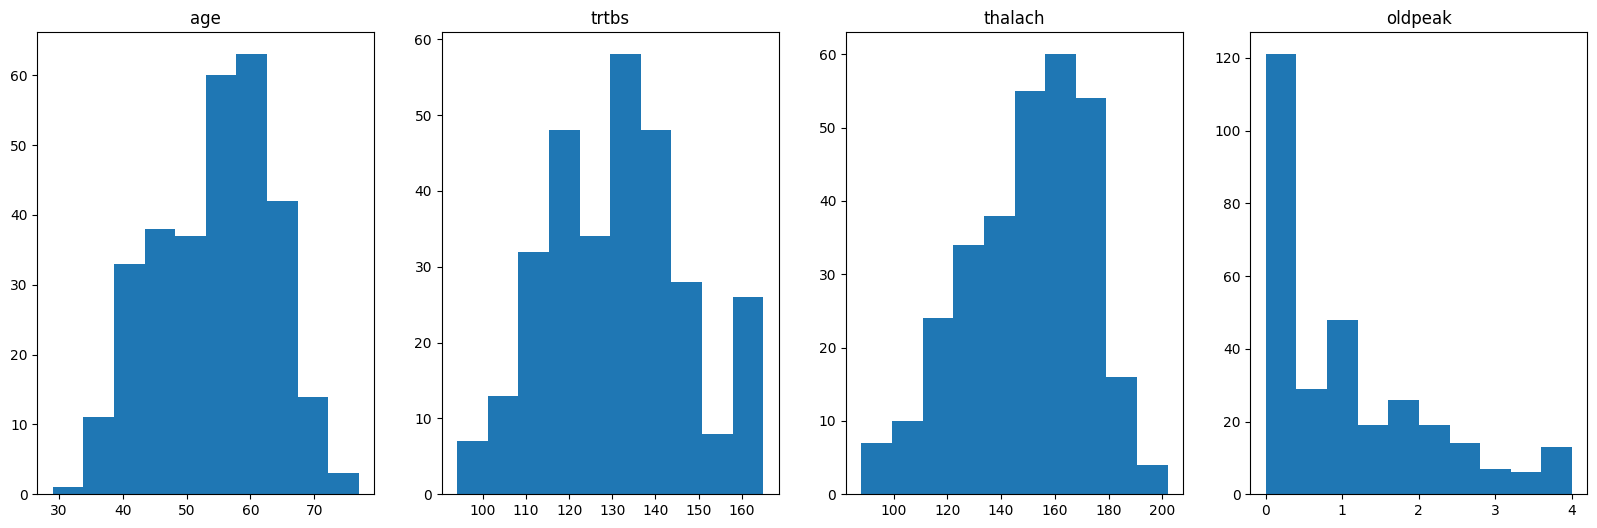

In [111]:
fig, (ax1,  ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbs")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak")

plt.show()

In [112]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


#### We will need the variables to have symmetrical distribution before applying Machine Learning

#### Operation on Unsymmetrical Data - Transformational Operations

In [113]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [114]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63.0,1.0,3.0,150.0,0.0,0.0,0.0,1.0,1.0,145.0,2.3,0.832909,1.516575
1,37.0,1.0,2.0,187.0,0.0,0.0,0.0,2.0,1.0,130.0,3.5,1.252763,1.870829
2,41.0,0.0,1.0,172.0,0.0,2.0,0.0,2.0,1.0,130.0,1.4,0.336472,1.183216
3,56.0,1.0,1.0,178.0,0.0,2.0,0.0,2.0,1.0,120.0,0.8,-0.223144,0.894427
4,57.0,0.0,0.0,163.0,1.0,2.0,0.0,2.0,1.0,120.0,0.6,-0.510826,0.774597


In [115]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [116]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [117]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63.0,1.0,3.0,150.0,0.0,0.0,0.0,1.0,1.0,145.0,1.516575
1,37.0,1.0,2.0,187.0,0.0,0.0,0.0,2.0,1.0,130.0,1.870829
2,41.0,0.0,1.0,172.0,0.0,2.0,0.0,2.0,1.0,130.0,1.183216
3,56.0,1.0,1.0,178.0,0.0,2.0,0.0,2.0,1.0,120.0,0.894427
4,57.0,0.0,0.0,163.0,1.0,2.0,0.0,2.0,1.0,120.0,0.774597


#### Machine Learning Models do not work with Categorical Variables, all categorical variables need to be converted to Numerical Variables

#### This is achieved by using One Hot Encoding on Categorical Variables - Converting variables to a binary format, 1- where available, 0- where not available. Uisng the Dummies function

#### Backing Up Data

In [118]:
df_copy = df.copy()

In [119]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63.0,1.0,3.0,150.0,0.0,0.0,0.0,1.0,1.0,145.0,1.516575
1,37.0,1.0,2.0,187.0,0.0,0.0,0.0,2.0,1.0,130.0,1.870829
2,41.0,0.0,1.0,172.0,0.0,2.0,0.0,2.0,1.0,130.0,1.183216
3,56.0,1.0,1.0,178.0,0.0,2.0,0.0,2.0,1.0,120.0,0.894427
4,57.0,0.0,0.0,163.0,1.0,2.0,0.0,2.0,1.0,120.0,0.774597


In [120]:
df_copy = df_copy.astype('int')

In [121]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1
1,37,1,2,187,0,0,0,2,1,130,1
2,41,0,1,172,0,2,0,2,1,130,1
3,56,1,1,178,0,2,0,2,1,120,0
4,57,0,0,163,1,2,0,2,1,120,0


In [122]:
categorical_var

['sex', 'cp', 'fbs']

In [123]:
categorical_var.remove("fbs")

In [124]:
categorical_var

['sex', 'cp']

In [125]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1
1,37,1,2,187,0,0,0,2,1,130,1
2,41,0,1,172,0,2,0,2,1,130,1
3,56,1,1,178,0,2,0,2,1,120,0
4,57,0,0,163,1,2,0,2,1,120,0


#### Scaling NUmerical Data before putting datasets into Machine Learning

In [126]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [127]:
robust_scalar = RobustScaler()

In [128]:
df_copy[new_numeric_var] = robust_scalar.fit_transform(df_copy[new_numeric_var])

In [129]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,0.581818,1,3,-0.095238,0,0,0,1,1,0.75,1.0
1,-1.309091,1,2,1.079365,0,0,0,2,1,0.00,1.0
2,-1.018182,0,1,0.603175,0,2,0,2,1,0.00,1.0
3,0.072727,1,1,0.793651,0,2,0,2,1,-0.50,0.0
4,0.145455,0,0,0.317460,1,2,0,2,1,-0.50,0.0


#### Separating Data Into Test and Training DataSets

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [133]:
X_train.head()

,age,sex,cp,thalach,exang,slope,ca,thal,trtbps_winsorize,oldpeak_winsorize_sqrt
201,0.363636,1,0,-0.380952,1,1,1,3,-0.25,1.0
82,0.363636,0,2,0.222222,0,2,1,2,-1.40,0.0
187,-0.072727,1,0,-1.396825,1,1,1,3,-0.30,1.0
259,-1.236364,1,3,0.920635,1,1,0,3,-0.50,1.0
5,0.145455,1,0,-0.158730,0,1,0,1,0.50,0.0


In [134]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [135]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


#### Logistic Regression Model

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [137]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [138]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [139]:
y_pred = log_reg.predict(X_test)

In [140]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [141]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8387096774193549


**Cross Vlaidation to test Accuracy of model**

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Coss Validation Accuracy Score", scores.mean())

Coss Validation Accuracy Score 0.8333333333333333


**Roc Curve and Area Under Curve (AUC)**

In [144]:
from sklearn.metrics import RocCurveDisplay

In [145]:
#RocCurveDisplay(log_reg, y_test, y_pred, estimator_name = "Logistic Regression")#roc_auc=None, estimator_name=None, pos_label=None
#plt.title("Logistic Regression Roc Curve and AUC")
#plt.plot([0, 1], [0, 1], "r--")
#plt.show()

**Gridsearch for HyoerParameter Optimization**

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [155]:
parameters = {"penalty" : ["l1", "l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [156]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [157]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [158]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}


In [159]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [160]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [161]:
y_pred = log_reg_new2.predict(X_test)

In [168]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8387096774193549


In [166]:
#RocCurveDisplay(log_reg_new2, y_test, estimator_name = "Logistic Regression GridSearchCV")#roc_auc=None, estimator_name=None, pos_label=None
#plt.title("Logistic Regression GridSearchCV Roc Curve and AUC")
#plt.plot([0, 1], [0, 1], "r--")
#plt.show()

**Decision Tree Algorithms**

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [172]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [174]:
y_pred = dec_tree.predict(X_test)

In [175]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.7096774193548387


In [176]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Coss Validation Accuracy Score", scores.mean())

Coss Validation Accuracy Score 0.75


**Support Vector Machine Algorithm**

In [177]:
from sklearn.svm import SVC

In [179]:
svc_model = SVC(random_state = 5)

In [180]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [182]:
y_pred = svc_model.predict(X_test)

In [184]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [185]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Coss Validation Accuracy Score", scores.mean())

Coss Validation Accuracy Score 0.8


**Random Forest Algorithm**

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
random_forest = RandomForestClassifier(random_state = 5)

In [188]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [189]:
y_pred = random_forest.predict(X_test)

In [190]:
print("The test accuracy score of Random Forest is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is: 0.9032258064516129


In [191]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Coss Validation Accuracy Score", scores.mean())

Coss Validation Accuracy Score 0.8333333333333334


**Hyperparameter Optimization using GridSearchCV**

In [192]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [193]:
parameters = {"n_estimators" : [50,100, 150, 200],
             "criterion" : ["gini","entropy"],
             "max_feature" : ['auto', 'sqrt', 'log2'],
             "bootstrap" : [True, False]}

In [194]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)